In [20]:
from keras.datasets import imdb
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [18]:
word_index = imdb.get_word_index()
reverse_word_index =dict([(value, key) for (key, value) in word_index.items()])
train_data_0 = [reverse_word_index.get(i-3, '?') for i in train_data[0]]

In [37]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [39]:
x_train = vectorize_sequences(train_data)

In [40]:
x_test = vectorize_sequences(test_data)

In [43]:
x_train.shape, x_train.ndim

((25000, 10000), 2)

In [44]:
x_test.shape, x_test.ndim

((25000, 10000), 2)

In [45]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
y_train = np.asarray(train_labels).astype('float32')

In [49]:
y_test = np.asarray(test_labels).astype('float32')

In [50]:
from keras import models
from keras import layers

In [52]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
partial_train_data = x_train[:10000]
partial_train_labels = y_train[:10000]

partial_val_data = x_train[10000:]
partial_val_labels = y_train[10000:]

In [55]:
history = model.fit(partial_train_data, partial_train_labels, epochs=20, batch_size=128, validation_data=(partial_val_data, partial_val_labels))

Train on 10000 samples, validate on 15000 samples
Epoch 1/20
10000/10000 [==============================] - 5s 531us/step - loss: 0.4526 - acc: 0.8201 - val_loss: 0.3307 - val_acc: 0.8751
Epoch 2/20
10000/10000 [==============================] - 2s 241us/step - loss: 0.2282 - acc: 0.9225 - val_loss: 0.2920 - val_acc: 0.8843
Epoch 3/20
10000/10000 [==============================] - 2s 240us/step - loss: 0.1519 - acc: 0.9483 - val_loss: 0.3326 - val_acc: 0.8751
Epoch 4/20
10000/10000 [==============================] - 2s 238us/step - loss: 0.1064 - acc: 0.9678 - val_loss: 0.3362 - val_acc: 0.8797
Epoch 5/20
10000/10000 [==============================] - 2s 241us/step - loss: 0.0761 - acc: 0.9767 - val_loss: 0.3782 - val_acc: 0.8725
Epoch 6/20
10000/10000 [==============================] - 2s 240us/step - loss: 0.0552 - acc: 0.9836 - val_loss: 0.4385 - val_acc: 0.8672
Epoch 7/20
10000/10000 [==============================] - 2s 241us/step - loss: 0.0386 - acc: 0.9898 - val_loss: 0.5089 - 

In [56]:
history.history??

In [57]:
import matplotlib.pyplot as plt

In [59]:
train_log = history.history

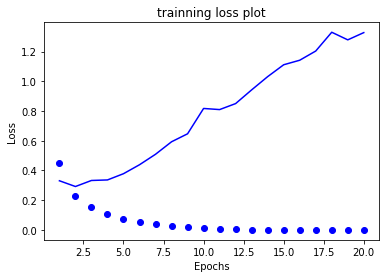

In [66]:
train_epochs = len(train_log['acc'])
x_labels = [epoch for epoch in range(1, train_epochs+1)]
plt.plot(x_labels, train_log['loss'], 'bo', label='train_loss')
plt.plot(x_labels, train_log['val_loss'], 'b', label='validation_loss')
plt.title('trainning loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

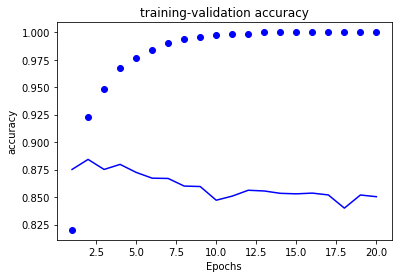

In [65]:
# accuracy 和 validation accuracy
plt.plot(x_labels, train_log['acc'], 'bo', label='train acc')
plt.plot(x_labels, train_log['val_acc'], 'b', label='validation acc')
plt.title('training-validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [124]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', metrics=['accuracy'], optimizer='rmsprop')
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.1428 - acc: 0.8320 0s - loss: 0.1435 - acc: 0.831
Epoch 2/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.0751 - acc: 0.9127
Epoch 3/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.0543 - acc: 0.9339
Epoch 4/4
25000/25000 [==============================] - 3s 120us/step


In [119]:
results

[0.09701398791790009, 0.86996]

In [127]:
test_case = "this film is very horrible, I'll never see it again,garbage!"
words_list = test_case.split(" ")
test_case_vector = [word_index.get(word, 0) for word in words_list]

In [128]:
test_case_vector = vectorize_sequences(np.asarray([test_case_vector]))

In [129]:
model.predict(x_test)

array([[0.08779439],
       [0.9895778 ],
       [0.91234845],
       ...,
       [0.13895932],
       [0.07986806],
       [0.44949841]], dtype=float32)

In [130]:
model.predict(test_case_vector)

array([[0.59518343]], dtype=float32)